In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.constraints import max_norm, MinMaxNorm

Using TensorFlow backend.


In [3]:
def func1(x):
    return x**2*(np.abs(x)<=2) + 4*(np.abs(x)>2)

def func2(x):
    return - x**2*(np.abs(x)<=2) - 4*(np.abs(x)>2)
    
    
Xtest = np.arange(-5, 5, 0.1)
Ytest1 = func1(Xtest)
Ytest2 = func2(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn1 = func1(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))
Ylearn2 = func2(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))

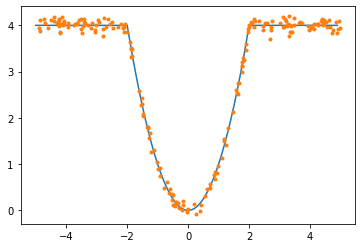

In [4]:
plt.plot(Xtest, Ytest1)
plt.plot(Xlearn, Ylearn1, '.', label='Raw input data with noise')
plt.show()

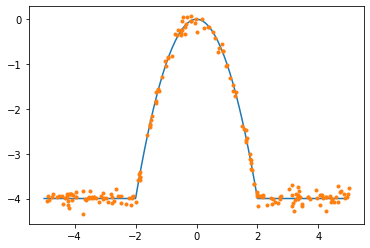

In [5]:
plt.plot(Xtest, Ytest2)
plt.plot(Xlearn, Ylearn2, '.', label='Raw input data with noise')
plt.show()

In [6]:
model1 = Sequential()
model1.add(Dense(8, input_dim=1, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(Dense(1, activation='linear'))
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [7]:
nepoch = 100
nbatch = 10
model1.fit(Xlearn, Ylearn1, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 7.6330 - mse: 7.6330
Epoch 2/100
200/200 [==============================] - 0s 235us/step - loss: 4.0905 - mse: 4.0905
Epoch 3/100
200/200 [==============================] - 0s 229us/step - loss: 1.5679 - mse: 1.5679
Epoch 4/100
200/200 [==============================] - 0s 264us/step - loss: 0.8025 - mse: 0.8025
Epoch 5/100
200/200 [==============================] - 0s 222us/step - loss: 0.8290 - mse: 0.8290
Epoch 6/100
200/200 [==============================] - 0s 298us/step - loss: 0.7351 - mse: 0.7351
Epoch 7/100
200/200 [==============================] - 0s 206us/step - loss: 0.7634 - mse: 0.7634
Epoch 8/100
200/200 [==============================] - 0s 217us/step - loss: 0.7419 - mse: 0.7419
Epoch 9/100
200/200 [==============================] - 0s 285us/step - loss: 0.6418 - mse: 0.6418
Epoch 10/100
200/200 [==============================] - 0s 210us/step - loss: 0.6371 - mse: 0.6371
Epoch 11/100
200/200 

200/200 [==============================] - 0s 229us/step - loss: 0.1044 - mse: 0.1044
Epoch 84/100
200/200 [==============================] - 0s 233us/step - loss: 0.1160 - mse: 0.1160
Epoch 85/100
200/200 [==============================] - 0s 223us/step - loss: 0.0960 - mse: 0.0960
Epoch 86/100
200/200 [==============================] - 0s 213us/step - loss: 0.1098 - mse: 0.1098
Epoch 87/100
200/200 [==============================] - 0s 204us/step - loss: 0.1453 - mse: 0.1453
Epoch 88/100
200/200 [==============================] - 0s 220us/step - loss: 0.1077 - mse: 0.1077
Epoch 89/100
200/200 [==============================] - 0s 197us/step - loss: 0.0809 - mse: 0.0809
Epoch 90/100
200/200 [==============================] - 0s 201us/step - loss: 0.0873 - mse: 0.0873
Epoch 91/100
200/200 [==============================] - 0s 203us/step - loss: 0.1046 - mse: 0.1046
Epoch 92/100
200/200 [==============================] - 0s 205us/step - loss: 0.0986 - mse: 0.0986
Epoch 93/100
200/200 [=

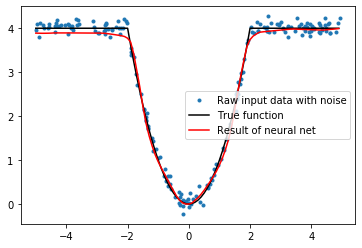

In [7]:
Ylearned1 = model1.predict(Xtest)

plt.plot(Xlearn, Ylearn1, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest1, label='True function', c='black')
plt.plot(Xtest, Ylearned1, label='Result of neural net', c='red')
plt.legend()

In [12]:
model2 = Sequential()
model2.add(Dense(8, input_dim=1, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [13]:
nepoch = 100
nbatch = 10
model2.fit(Xlearn, Ylearn2, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 6.6878 - mse: 6.6878
Epoch 2/100
200/200 [==============================] - 0s 234us/step - loss: 1.3014 - mse: 1.3014
Epoch 3/100
200/200 [==============================] - 0s 226us/step - loss: 0.8012 - mse: 0.8012
Epoch 4/100
200/200 [==============================] - 0s 232us/step - loss: 0.7705 - mse: 0.7705
Epoch 5/100
200/200 [==============================] - 0s 203us/step - loss: 0.7169 - mse: 0.7169
Epoch 6/100
200/200 [==============================] - 0s 223us/step - loss: 0.7600 - mse: 0.7600
Epoch 7/100
200/200 [==============================] - 0s 216us/step - loss: 0.6891 - mse: 0.6891
Epoch 8/100
200/200 [==============================] - 0s 223us/step - loss: 0.6697 - mse: 0.6697
Epoch 9/100
200/200 [==============================] - 0s 231us/step - loss: 0.6994 - mse: 0.6994
Epoch 10/100
200/200 [==============================] - 0s 192us/step - loss: 0.6903 - mse: 0.6903
Epoch 11/100
200/200 

200/200 [==============================] - 0s 377us/step - loss: 0.1195 - mse: 0.1195
Epoch 84/100
200/200 [==============================] - 0s 336us/step - loss: 0.0921 - mse: 0.0921
Epoch 85/100
200/200 [==============================] - 0s 301us/step - loss: 0.1035 - mse: 0.1035
Epoch 86/100
200/200 [==============================] - 0s 231us/step - loss: 0.0729 - mse: 0.0729
Epoch 87/100
200/200 [==============================] - 0s 184us/step - loss: 0.0829 - mse: 0.0829
Epoch 88/100
200/200 [==============================] - 0s 209us/step - loss: 0.0977 - mse: 0.0977
Epoch 89/100
200/200 [==============================] - 0s 213us/step - loss: 0.0969 - mse: 0.0969
Epoch 90/100
200/200 [==============================] - 0s 211us/step - loss: 0.1057 - mse: 0.1057
Epoch 91/100
200/200 [==============================] - 0s 187us/step - loss: 0.0826 - mse: 0.0826
Epoch 92/100
200/200 [==============================] - 0s 209us/step - loss: 0.0967 - mse: 0.0967
Epoch 93/100
200/200 [=

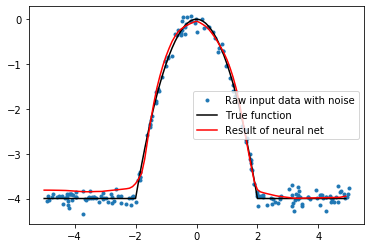

In [14]:
Ylearned2 = model2.predict(Xtest)

plt.plot(Xlearn, Ylearn2, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest2, label='True function', c='black')
plt.plot(Xtest, Ylearned2, label='Result of neural net', c='red')
plt.legend()

In [73]:
def func3(x):
    y = np.copy(x)
    y[np.where(x<0)] = -1
    y[np.where(x>0)] = 1
    return y
    
Xtest = np.arange(-5, 5, 0.1)
Ytest3 = func3(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn3 = func3(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))


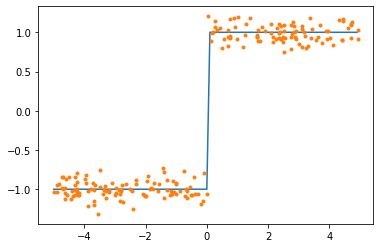

In [74]:
plt.plot(Xtest, Ytest3)
plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.show()

In [75]:
model3 = Sequential()
model3.add(Dense(8, input_dim=1, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [76]:
nepoch = 100
nbatch = 10
model3.fit(Xlearn, Ylearn3, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4414 - mse: 0.4414
Epoch 2/100
200/200 [==============================] - 0s 472us/step - loss: 0.2411 - mse: 0.2411
Epoch 3/100
200/200 [==============================] - 0s 457us/step - loss: 0.2181 - mse: 0.2181
Epoch 4/100
200/200 [==============================] - 0s 427us/step - loss: 0.1800 - mse: 0.1800
Epoch 5/100
200/200 [==============================] - 0s 414us/step - loss: 0.1613 - mse: 0.1613
Epoch 6/100
200/200 [==============================] - 0s 416us/step - loss: 0.1307 - mse: 0.1307
Epoch 7/100
200/200 [==============================] - 0s 392us/step - loss: 0.1130 - mse: 0.1130
Epoch 8/100
200/200 [==============================] - 0s 398us/step - loss: 0.1021 - mse: 0.1021
Epoch 9/100
200/200 [==============================] - 0s 409us/step - loss: 0.0882 - mse: 0.0882
Epoch 10/100
200/200 [==============================] - 0s 336us/step - loss: 0.0658 - mse: 0.0658
Epoch 11/100
200/200 

200/200 [==============================] - 0s 344us/step - loss: 0.0314 - mse: 0.0314
Epoch 84/100
200/200 [==============================] - 0s 329us/step - loss: 0.0341 - mse: 0.0341
Epoch 85/100
200/200 [==============================] - 0s 341us/step - loss: 0.0332 - mse: 0.0332
Epoch 86/100
200/200 [==============================] - 0s 288us/step - loss: 0.0314 - mse: 0.0314
Epoch 87/100
200/200 [==============================] - 0s 356us/step - loss: 0.0369 - mse: 0.0369
Epoch 88/100
200/200 [==============================] - 0s 299us/step - loss: 0.0294 - mse: 0.0294
Epoch 89/100
200/200 [==============================] - 0s 327us/step - loss: 0.0317 - mse: 0.0317
Epoch 90/100
200/200 [==============================] - 0s 247us/step - loss: 0.0269 - mse: 0.0269
Epoch 91/100
200/200 [==============================] - 0s 372us/step - loss: 0.0309 - mse: 0.0309
Epoch 92/100
200/200 [==============================] - 0s 384us/step - loss: 0.0321 - mse: 0.0321
Epoch 93/100
200/200 [=

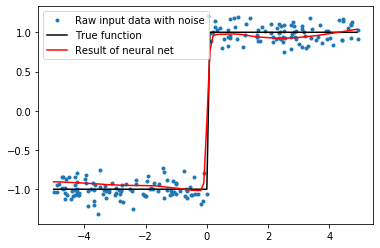

In [77]:
Ylearned3 = model3.predict(Xtest)

plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest3, label='True function', c='black')
plt.plot(Xtest, Ylearned3, label='Result of neural net', c='red')
plt.legend()

In [78]:
def func3(x):
    y = np.copy(x)
    y[np.where((x<-1))] = -1
    y[np.where((x>0) &(x<1))] = 0
    y[np.where(x>=1)] = 1
    return y
    
Xtest = np.arange(-5, 5, 0.1)
Ytest3 = func3(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn3 = func3(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))


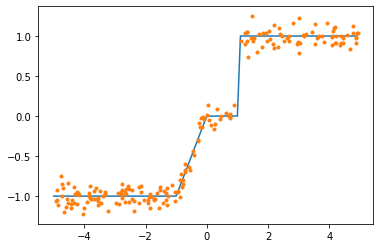

In [79]:
plt.plot(Xtest, Ytest3)
plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.show()

In [80]:
model3 = Sequential()
model3.add(Dense(8, input_dim=1, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [81]:
nepoch = 200
nbatch = 20
model3.fit(Xlearn, Ylearn3, epochs=nepoch, batch_size=nbatch)

Epoch 1/200
200/200 [==============================] - 0s 2ms/step - loss: 0.6438 - mse: 0.6438
Epoch 2/200
200/200 [==============================] - 0s 245us/step - loss: 0.2079 - mse: 0.2079
Epoch 3/200
200/200 [==============================] - 0s 184us/step - loss: 0.1753 - mse: 0.1753
Epoch 4/200
200/200 [==============================] - 0s 253us/step - loss: 0.1609 - mse: 0.1609
Epoch 5/200
200/200 [==============================] - 0s 182us/step - loss: 0.1496 - mse: 0.1496
Epoch 6/200
200/200 [==============================] - 0s 207us/step - loss: 0.1373 - mse: 0.1373
Epoch 7/200
200/200 [==============================] - 0s 233us/step - loss: 0.1331 - mse: 0.1331
Epoch 8/200
200/200 [==============================] - 0s 205us/step - loss: 0.1283 - mse: 0.1283
Epoch 9/200
200/200 [==============================] - 0s 213us/step - loss: 0.1202 - mse: 0.1202
Epoch 10/200
200/200 [==============================] - 0s 182us/step - loss: 0.0996 - mse: 0.0996
Epoch 11/200
200/200 

200/200 [==============================] - 0s 190us/step - loss: 0.0209 - mse: 0.0209
Epoch 84/200
200/200 [==============================] - 0s 169us/step - loss: 0.0195 - mse: 0.0195
Epoch 85/200
200/200 [==============================] - 0s 222us/step - loss: 0.0188 - mse: 0.0188
Epoch 86/200
200/200 [==============================] - 0s 191us/step - loss: 0.0200 - mse: 0.0200
Epoch 87/200
200/200 [==============================] - 0s 148us/step - loss: 0.0204 - mse: 0.0204
Epoch 88/200
200/200 [==============================] - 0s 195us/step - loss: 0.0194 - mse: 0.0194
Epoch 89/200
200/200 [==============================] - 0s 195us/step - loss: 0.0231 - mse: 0.0231
Epoch 90/200
200/200 [==============================] - 0s 183us/step - loss: 0.0215 - mse: 0.0215
Epoch 91/200
200/200 [==============================] - 0s 215us/step - loss: 0.0257 - mse: 0.0257
Epoch 92/200
200/200 [==============================] - 0s 193us/step - loss: 0.0208 - mse: 0.0208
Epoch 93/200
200/200 [=

200/200 [==============================] - 0s 210us/step - loss: 0.0160 - mse: 0.0160
Epoch 166/200
200/200 [==============================] - 0s 165us/step - loss: 0.0183 - mse: 0.0183
Epoch 167/200
200/200 [==============================] - 0s 184us/step - loss: 0.0170 - mse: 0.0170
Epoch 168/200
200/200 [==============================] - 0s 178us/step - loss: 0.0152 - mse: 0.0152
Epoch 169/200
200/200 [==============================] - 0s 161us/step - loss: 0.0166 - mse: 0.0166
Epoch 170/200
200/200 [==============================] - 0s 228us/step - loss: 0.0156 - mse: 0.0156
Epoch 171/200
200/200 [==============================] - 0s 167us/step - loss: 0.0171 - mse: 0.0171
Epoch 172/200
200/200 [==============================] - 0s 189us/step - loss: 0.0132 - mse: 0.0132
Epoch 173/200
200/200 [==============================] - 0s 204us/step - loss: 0.0137 - mse: 0.0137
Epoch 174/200
200/200 [==============================] - 0s 157us/step - loss: 0.0152 - mse: 0.0152
Epoch 175/200


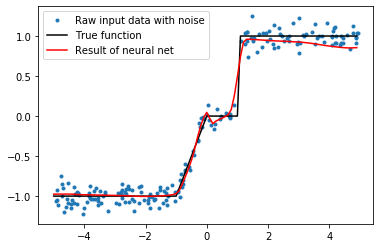

In [83]:
Ylearned3 = model3.predict(Xtest)

plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest3, label='True function', c='black')
plt.plot(Xtest, Ylearned3, label='Result of neural net', c='red')
plt.legend()